In [153]:
#Nishant Bhatt Dataset-1
#8902894

In [154]:
#import libraries as required
import pandas as pd
import numpy as np

In [155]:
#importing the data set
df_1 = pd.read_csv("Loan_figures.csv")

### Task 2 Data Exploration with Python

In [156]:
# Display the first rows to get an overview of the dataset
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
# Summary statistics of dataset
df_1.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [158]:
#checking datatypes and missing values
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB
None


In [159]:
#finding missing values
df_1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [160]:
#import piplite
#await piplite.install('seaborn')

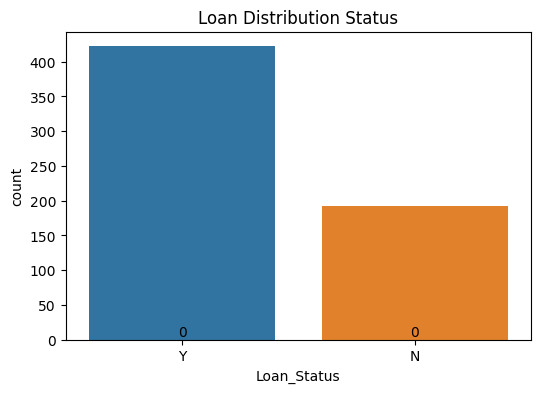

In [161]:
#identifying loan status Distribution of approved as AP and not approved NA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Loan_Status", data=df_1)

approved_count = df_1[df_1['Loan_Status'] == 'AP'].shape[0]
not_approved_count = df_1[df_1['Loan_Status'] == 'NA'].shape[0]

# Annotate the approved and not-approved counts on top of each bar
ax.annotate(f'{approved_count}', xy=(0, approved_count), ha='center', va='bottom')
ax.annotate(f'{not_approved_count}', xy=(1, not_approved_count), ha='center', va='bottom')

plt.title("Loan Distribution Status")
plt.show()


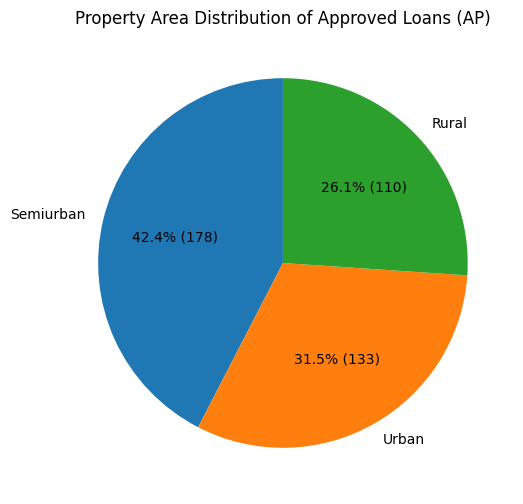

In [162]:
#loan approval in terms of property area distribution
import matplotlib.pyplot as plt
import seaborn as sns

approved_df_1 = df_1[df_1['Loan_Status'] == 'Y']

# Calculating the count 
property_area_counts = approved_df_1['Property_Area'].value_counts()
total_approved_loans = approved_df_1.shape[0]
property_area_percentages = (property_area_counts / total_approved_loans) * 100

#ploting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * total_approved_loans / 100)})', startangle=90)
plt.title("Property Area Distribution of Approved Loans (AP)")

plt.show()


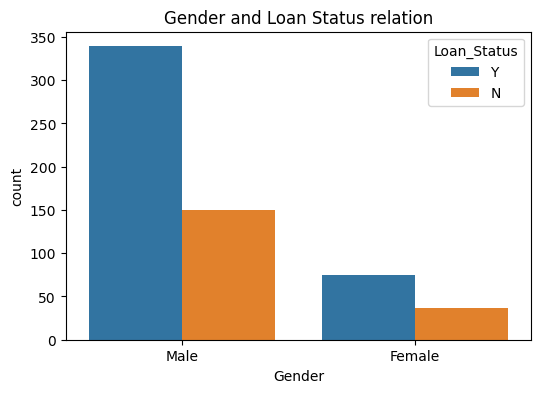

In [163]:
#finding gender wise loan status of approval 
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Loan_Status", data=df_1)
plt.title("Gender and Loan Status relation")
plt.show()

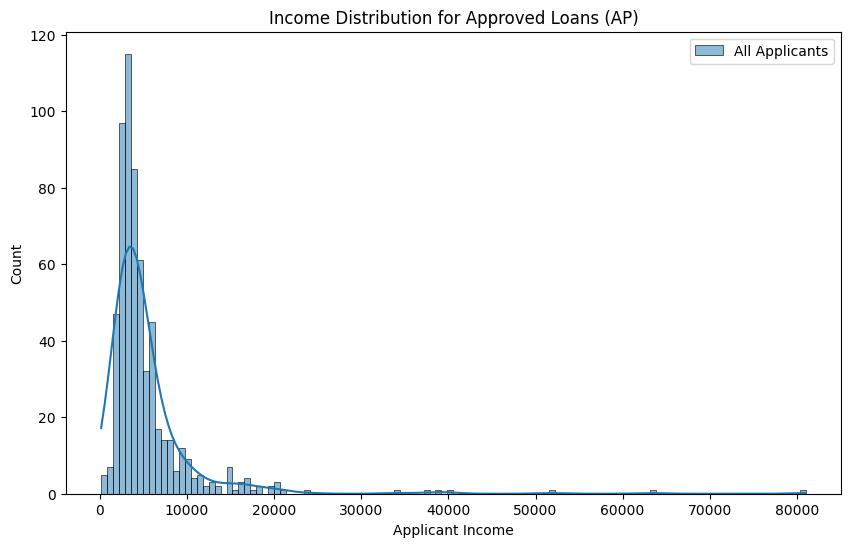

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns



# Filtering DataFrame to include only rows with 'Loan_Status' == 'AP'
approved_df_1 = df_1[df_1['Loan_Status'] == 'AP']

# Creating figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Ploting the histogram for Applicant Income
sns.histplot(df_1['ApplicantIncome'], kde=True, ax=ax, label='All Applicants')

# Ploting the histogram for Applicant Income for approved loans ('AP')
sns.histplot(approved_df_1['ApplicantIncome'], kde=True, ax=ax, color='green', label='Approved Loans')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Income Distribution for Approved Loans (AP)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


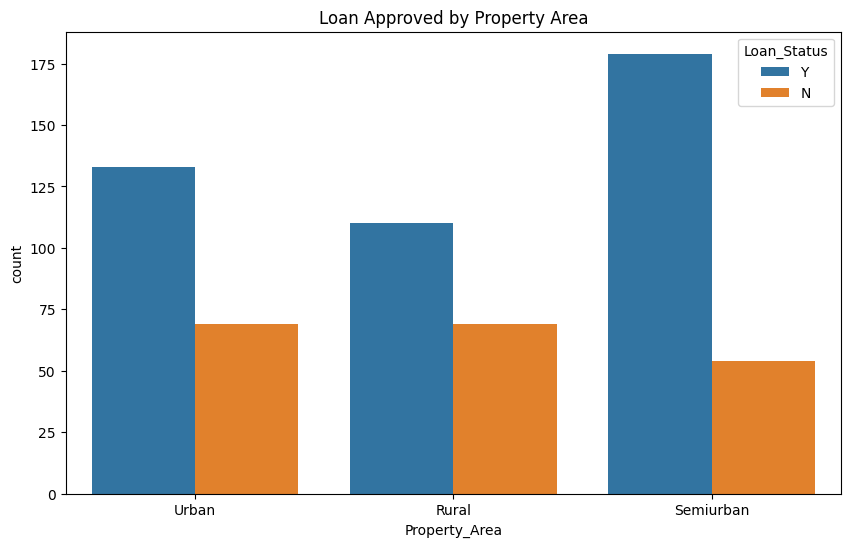

In [165]:
#Loan Approved by Property Area
plt.figure(figsize=(10, 6))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df_1)
plt.title("Loan Approved by Property Area")
plt.show()



### Task 3 Data Preprocessing with Python

In [166]:
df_1['Dependents'] = pd.to_numeric(df_1['Dependents'], errors='coerce')

# Converting 'LoanAmount' and 'Loan_Amount_Term' columns to numeric
df_1['LoanAmount'] = pd.to_numeric(df_1['LoanAmount'], errors='coerce')
df_1['Loan_Amount_Term'] = pd.to_numeric(df_1['Loan_Amount_Term'], errors='coerce')

# Handling missing values
# In this, we will provide missing values in 'LoanAmount' and 'Loan_Amount_Term' with their respective means
mean_loan_amount = df_1['LoanAmount'].mean()
mean_loan_term = df_1['Loan_Amount_Term'].mean()

df_1['LoanAmount'].fillna(mean_loan_amount, inplace=True)
df_1['Loan_Amount_Term'].fillna(mean_loan_term, inplace=True)

# Converting categorical variables to numerical using one-hot encoding
df_1 = pd.get_dummies(df_1, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Convert 'Loan_Status' to binary values
df_1['Loan_Status'] = df_1['Loan_Status'].map({'Y': 1, 'N': 0})

In [167]:
#checking if the data types of the columns are changed or not 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               548 non-null    float64
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           564 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Male              614 non-null    uint8  
 9   Married_Yes              614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(5), int64(2), o

In [168]:
df_1.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1


In [169]:
df_1.isnull().sum()

Loan_ID                     0
Dependents                 66
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Gender_Male                 0
Married_Yes                 0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [170]:
#from the above code we found that column Dependents and Credit_History contains missing values of 66 and 50 respectively
# Handling missing values in 'Dependents' and 'Credit_History' columns
# filling missing categorical values with the most frequent value (mode)
df_1['Dependents'].fillna(df_1['Dependents'].mode()[0], inplace=True)
df_1['Credit_History'].fillna(df_1['Credit_History'].mode()[0], inplace=True)

# Printing the updated count of missing values in each column
print(df_1.isnull().sum())


Loan_ID                    0
Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


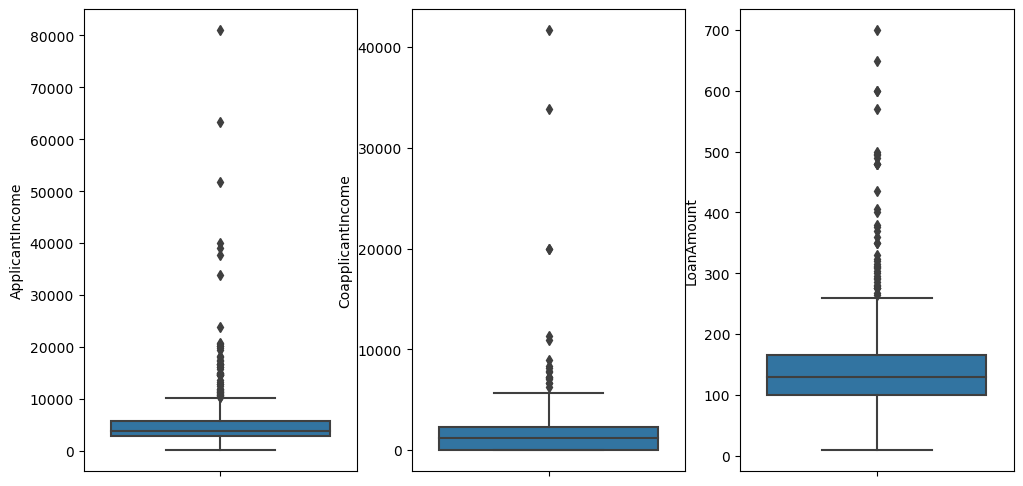

In [171]:
#check for outliers through box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=df_1)
plt.subplot(1, 3, 2)
sns.boxplot(y='CoapplicantIncome', data=df_1)
plt.subplot(1, 3, 3)
sns.boxplot(y='LoanAmount', data=df_1)
plt.show()

In [172]:
def handle_outliers_iqr(df_1, column):
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_1.loc[df_1[column] < lower_bound, column] = lower_bound
    df_1.loc[df_1[column] > upper_bound, column] = upper_bound

# Applying IQR method to 'ApplicantIncome' column
handle_outliers_iqr(df_1, 'ApplicantIncome')
handle_outliers_iqr(df_1, 'CoapplicantIncome')
handle_outliers_iqr(df_1, 'LoanAmount')

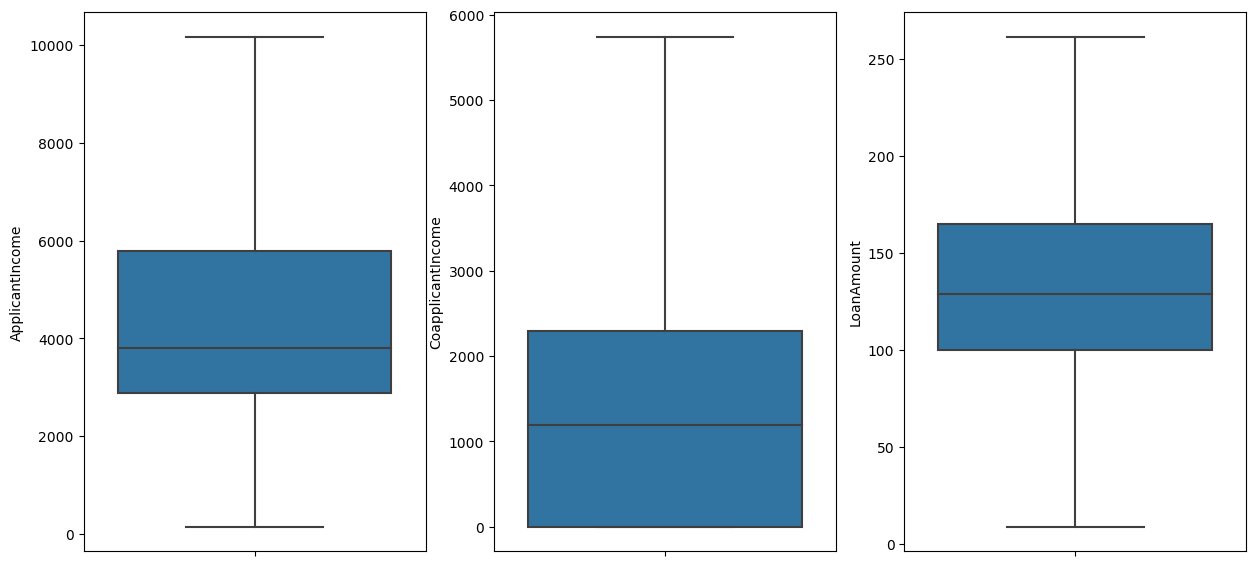

In [173]:
#check for outliers post processing outliers
#check for outliers through box plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=df_1)
plt.subplot(1, 3, 2)
sns.boxplot(y='CoapplicantIncome', data=df_1)
plt.subplot(1, 3, 3)
sns.boxplot(y='LoanAmount', data=df_1)
plt.show()

In [174]:
df_1.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1.0,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0.0,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0.0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0.0,6000.0,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1


### Task 4:  Implement Machine Learning Models with Python 

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_1 is your DataFrame with the dataset

# Separating the target variable (Loan_Status) from the features
X = df_1.drop(columns=['Loan_ID', 'Loan_Status','Gender_Male'])
y = df_1['Loan_Status']

# Spliting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features for better model performance
scaler_mp = StandardScaler()
X_train_scaled = scaler_mp.fit_transform(X_train)
X_test_scaled = scaler_mp.transform(X_test)

# Training Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_prediction_logistic = logistic_model.predict(X_test_scaled)

# Evaluating Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_prediction_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_prediction_logistic)
classification_report_logistic = classification_report(y_test, y_prediction_logistic)

print("Logistic Regression Model Accuracy:", accuracy_logistic)
print("Confusion Matrix Logistical Regression:")
print(confusion_matrix_logistic)
print("Classification Report Logistical Regression:")
print(classification_report_logistic)

# Training Random Forest Classification model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Making prediction on the test data
y_pred_nb = random_forest_model.predict(X_test_scaled)

# Evaluating Random Forest Classification model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print("Random Forest Classifier Model Accuracy:", accuracy_nb)
print("Confusion Matrix Random Forest Classifier:")
print(confusion_matrix_nb)
print("Classification Report Random Forest Classifier:")
print(classification_report_nb)

Logistic Regression Model Accuracy: 0.7886178861788617
Confusion Matrix Logistical Regression:
[[18 25]
 [ 1 79]]
Classification Report Logistical Regression:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest Classifier Model Accuracy: 0.7723577235772358
Confusion Matrix Random Forest Classifier:
[[19 24]
 [ 4 76]]
Classification Report Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



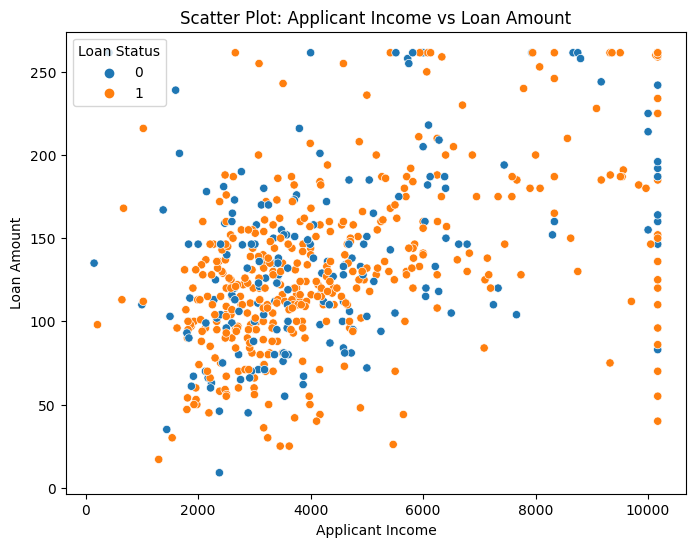

In [176]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Scatter Plot: Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

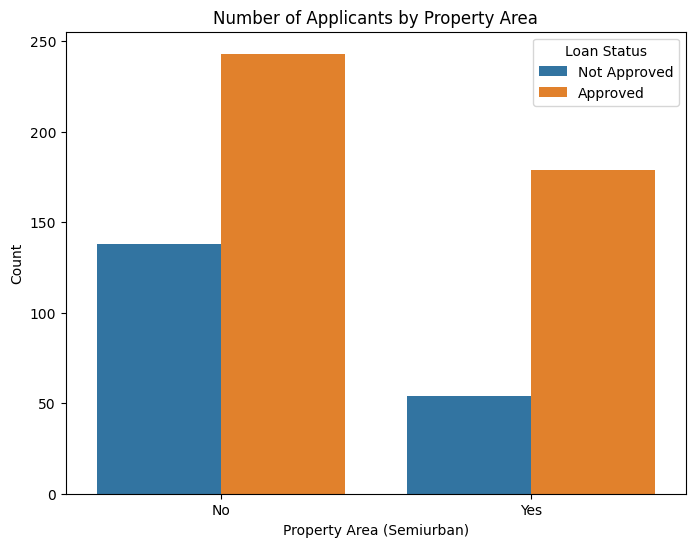

In [177]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_1, x='Property_Area_Semiurban', hue='Loan_Status')
#creating barplot
plt.title('Number of Applicants by Property Area')
plt.xlabel('Property Area (Semiurban)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

<ipython-input-178-1f61e7087dfb>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



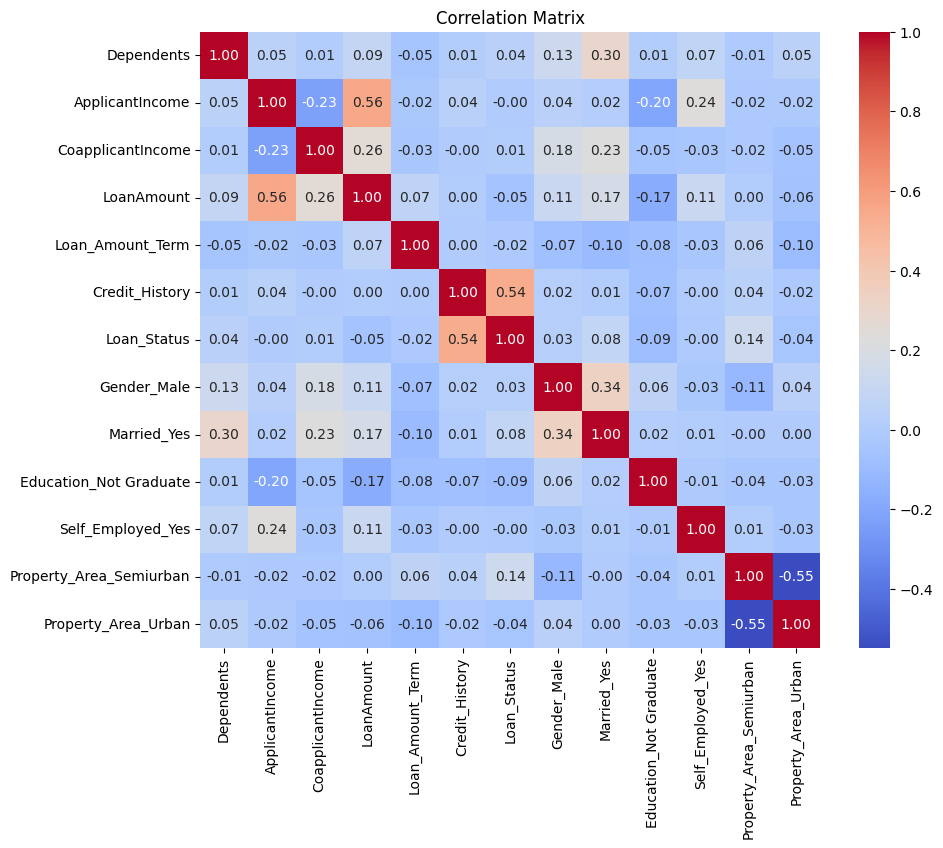

In [178]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#Creating heatmap
plt.title('Correlation Matrix')
plt.show()

In [179]:
#import piplite
#await piplite.install('plotly')

In [180]:
#import piplite
#await piplite.install("nbformat")


In [183]:
import pandas as pd

fig1 = px.bar(df_1, x='Loan_Status',  title='Loan Status by Gender', color='Gender')

# Interactive bar chart for Loan_Status by Property_Area
fig2 = px.bar(df_1, x='Loan_Status', title='Loan Status by Property Area', color='Property_Area')

# Interactive scatter plot for ApplicantIncome and LoanAmount
fig3 = px.scatter(df_1, x='ApplicantIncome', y='LoanAmount', color='Loan_Status', title='Applicant Income vs Loan Amount')

<class 'ValueError'>: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'] but received: Gender

In [182]:
fig1.show()

<class 'ValueError'>: Mime type rendering requires nbformat>=4.2.0 but it is not installed